# Topic 03: Bias
***

In [1]:
# Import numpy
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Demonstrating cognitive bias...how we can fool ourselves
# This code is obfuscated on purpose.
import operator as o__

def test(L):
    return True if o__.__ge__(0b10001, len(L) * 2 + sum([i - 0b10 for i in L])) and all([o__.__ge__(L[::-1][i], L[::-1][i+0b1]) for i in range(len(L)-1)]) else False

In [3]:
test([1, 2, 3, 4])

True

In [4]:
test([2, 3])

True

In [5]:
test([3, 2, 1])

False

In [6]:
test([1, 2, 3, 10])

True

In [7]:
test([1, 3, 2])

False

In [8]:
test([1, 1, 1])

True

In [9]:
test([2, 3, 5, 10])

False

## Exercise 1
***

Give three real-world examples of different types of cognitive bias.

**Confirmation bias** is the tendency to search for, interpret, focus on and remember information in a way that confirms one's preconceptions. **[1]**
Doctors can tend to interpret the information gained during a patient consultation to fit their preconceived diagnosis. For example, suspecting the patient has an infection and the detection of raised white blood cells proves this, rather than considering why the level of white blood cells are raised. **[2]** A raised white blood cell count this can be an indication of other conditions. **[3]**

**Normalcy bias** is a form of cognitive dissonance. It leads people to disbelieve or minimize threat warnings and so they fail to plan for, or react to, a disaster which has never happened before. **[4]** In a study of cognitive biases in software development, a developer did not realise the cause of his build failure was detailed in a new exception in compiler warnings because they had disregarded all compiler warnings out of habit.**[5]**

**Egocentric bias**  is the tendency to rely too heavily on one's own perspective and/or have a higher opinion of oneself than reality **[6]** . A study of drivers and their observation abilities found that novice drivers with less than one year of driving experience rated their observation abilities higher than more experienced drivers did, indicating their overconfidence. **[7]**

## Statistical Bias
***

In [10]:
# Generate a sample of 1000 values from a normal distribution.
x = np.random.normal(10.0, 1.0, 1000) # mean of 10 and standard deviation of 1. Multiply by 3 to find the range of 99% of values
x

array([10.10362626,  9.35066924,  9.83644081,  9.74633883, 11.30477967,
       10.91555471, 10.2081259 , 11.07900358,  9.35804763, 10.51222236,
        9.81349828, 11.08762185, 10.32555481,  9.09970599, 10.9340496 ,
       10.48466535, 10.83235172,  9.76030334, 10.34629879,  9.74472779,
        9.66233255, 10.43726948, 10.52728339,  9.31253502, 10.25261338,
       10.78274355, 10.32286405,  8.73811473, 10.69762379,  7.93912488,
       10.10789388, 11.30279034,  9.18491329, 10.04161462,  8.82173586,
        9.71389054, 10.56863331,  8.8573082 , 11.30255668, 11.07996031,
        9.05941963,  8.55061161, 12.59917556,  9.58189178,  8.82929981,
       11.29029631, 10.97769316,  8.81179899, 11.02167602, 10.62075598,
        9.56507874,  8.80316099,  9.6287673 , 10.14070603, 10.49856583,
       11.01081428,  8.30051977, 11.362635  ,  9.12443085,  9.10123874,
       10.07999226,  6.85781753, 10.7111897 , 10.31454805,  8.61997359,
       11.26219194, 11.75922554,  9.71463875, 10.40491417,  9.20

In [11]:
# We expect the mean of the sample to be close to the mean of the population.
x.mean()

9.959260622251954

The population parameters are unknown so the population could be infinite. The mean of 10 is the mean of the population and not the mean of the sample. The mean of the sample should be close to the mean of the population - a good estimate of the average of the population.

In [12]:
# How to check for a 'good estimate'
# Let's run a simulation of taking 1000 samples of size 1000.
samples = np.random.normal(10.0, 1.0, (1000, 1000)) #mean = 10, sd = 1, 1000 samples of * 1000 numbers = 1,000,000
samples

array([[10.58221069, 10.51219324,  8.61383431, ..., 10.999818  ,
        11.05023454,  8.82014754],
       [ 9.09495078,  9.90978864, 10.26558384, ..., 11.53705637,
         8.73171271, 10.79784422],
       [10.98396451,  9.84885352, 11.07473067, ...,  9.46777768,
         9.83810276, 11.06347116],
       ...,
       [10.80130215,  9.77879873,  8.80057808, ...,  9.99021842,
        11.74746986,  8.91604582],
       [ 9.38204359, 11.27558377, 10.83571981, ..., 12.00083022,
        10.42536685,  8.39614152],
       [ 9.53046755,  9.86106107, 11.16614036, ..., 10.4223265 ,
        10.25778657,  9.20137392]])

In [13]:
# Get the mean of the first sample.
samples[0].mean()

10.059931496194167

In [14]:
# Calculate the mean of all samples.
sample_means = samples.mean(axis=1)
sample_means

array([10.0599315 , 10.05068395,  9.96205951,  9.98570123, 10.00158753,
       10.0417826 ,  9.90483766,  9.97145017, 10.01003622, 10.03121034,
       10.05187483,  9.94939927,  9.9901185 , 10.1085737 ,  9.98179443,
       10.04196312,  9.97176813,  9.97512739, 10.03728883,  9.97105033,
        9.98821157, 10.00189995, 10.05126505,  9.9566677 ,  9.96273324,
       10.01259385,  9.99407333, 10.04227345,  9.98320656,  9.99871366,
       10.0028954 ,  9.95283732,  9.99679228,  9.99516791,  9.98597846,
        9.97121605,  9.98500386,  9.98784513, 10.0169348 ,  9.99558387,
       10.0084366 , 10.06440511, 10.00545085,  9.97241064,  9.97055658,
       10.01053385, 10.00428928,  9.9889115 ,  9.99430786,  9.97288853,
        9.93785941, 10.0220044 , 10.06255438,  9.99228431, 10.04557231,
       10.03320102,  9.98354078, 10.03921171,  9.99634283, 10.02847042,
       10.06107605,  9.95463922, 10.03899343, 10.01224298,  9.95334519,
       10.0095949 , 10.04765839,  9.96795538, 10.01842764,  9.99

Visualise how many of sample means fall within a particular range by plotting the means. 
The distribution of the means of each of the samples shows that the majority of means hit 10
The typical mean of the sample is a good estimate for the mean of the population > an example of an unbiased estimate. 

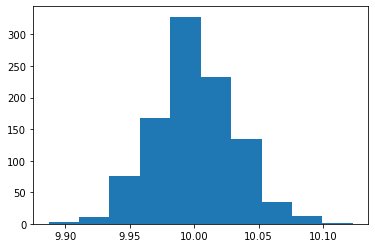

In [15]:
plt.hist(sample_means); 

### Histograms
Bar charts are used for discrete data e.g. number of children in a family. It will be 1, 2, 3, 4, etc but nothing in between those.
Histograms are used for continuous range of numbers e.g. height of adults because it covers a lot of variation within a range. Chop into a series of equally sized ranges i.e. bins

### Standard Deviation

It is designed to give a measure of how far the numbers are away from the mean in general. The mean does not work well to represent data with a wide spread.

Calculate the mean 
Subtract the mean from all the numbers (Zeroed) 


In [16]:
# A list of numbers - four small and one big.
numbers1 = np.array([1, 1, 1, 1, 10])

# Their mean.
np.mean(numbers1)

2.8

In [17]:
# A list of numbers - all close to each other.
numbers2 = np.array([2, 2, 3, 3, 4])

# Their mean.
np.mean(numbers2)

2.8

The example illustrates a common issue. 

The mean on its own is limited as a summary of the data points.

That is why we use the standard deviation - it gives us a measure of the spread.


In [18]:
# How to calculate sd
# Generate a sample of values - note we can see the population standard deviation.
x = np.random.normal(10.0, 1.0, 1000)
x

array([ 9.50532882, 10.35939406,  9.85453333, 11.01634371, 10.41851498,
       10.19147966,  9.74276627,  9.04546305, 10.66697975,  9.27475745,
        7.75740181,  9.64066738,  9.84403214,  8.81858276, 11.02476685,
        8.19055645,  9.96179464,  9.52829092,  8.74037475, 10.51976828,
       11.77870492, 10.93648197,  9.94465449, 10.47722707, 10.51673938,
       10.08696527, 10.31460909,  9.77493086,  9.48079551,  9.78814147,
       10.23122107,  9.94564977,  9.31570787, 10.69074831, 10.08946195,
        9.48109857, 10.86923059,  8.20254215,  9.87060995, 12.38536642,
        9.24294631,  9.56707865, 11.6553755 , 10.20424816,  9.35137753,
        9.57097051, 11.10094265,  9.51421635, 10.58193441, 11.54690047,
        9.39861531,  9.30146173,  9.75175601,  8.54601146, 11.33491755,
       10.68389914,  8.17132159,  9.06264882, 10.11468712, 10.13398907,
        9.33964632,  9.70263995, 10.19580295, 11.06875748,  8.71862117,
       10.19427922, 10.37078105,  9.46863386, 10.95561356,  9.54

In [19]:
# Calculate the mean.
x_mean = x.mean()

# Subtract the mean from each of the values.
zeroed = x - x_mean

# Have a look at the zeroed values.
zeroed

array([-4.66232210e-01,  3.87833034e-01, -1.17027702e-01,  1.04478268e+00,
        4.46953948e-01,  2.19918634e-01, -2.28794760e-01, -9.26097982e-01,
        6.95418715e-01, -6.96803577e-01, -2.21415922e+00, -3.30893651e-01,
       -1.27528889e-01, -1.15297827e+00,  1.05320581e+00, -1.78100458e+00,
       -9.76639476e-03, -4.43270108e-01, -1.23118628e+00,  5.48207251e-01,
        1.80714389e+00,  9.64920939e-01, -2.69065356e-02,  5.05666040e-01,
        5.45178347e-01,  1.15404245e-01,  3.43048064e-01, -1.96630166e-01,
       -4.90765517e-01, -1.83419563e-01,  2.59660036e-01, -2.59112640e-02,
       -6.55853156e-01,  7.19187279e-01,  1.17900922e-01, -4.90462463e-01,
        8.97669559e-01, -1.76901888e+00, -1.00951075e-01,  2.41380539e+00,
       -7.28614721e-01, -4.04482381e-01,  1.68381447e+00,  2.32687130e-01,
       -6.20183497e-01, -4.00590525e-01,  1.12938162e+00, -4.57344685e-01,
        6.10373377e-01,  1.57533944e+00, -5.72945720e-01, -6.70099303e-01,
       -2.19805023e-01, -

e-01 indicates exponential 10<sup>-1</sup> or 1/10

So -3.91675433e-02 is -3.91675433e/100 = 0.0391675433

These numbers indicate how far these numbers (means) are from the sample mean

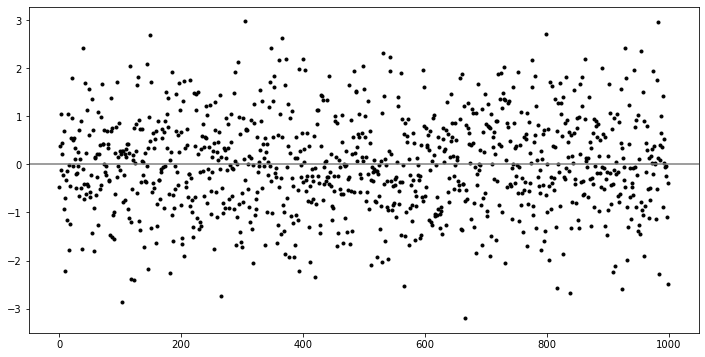

In [20]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the zeroed array, each value spaced out evenly along the x axis.
# Note the x axis is just the position of the value in the zeroed array.
ax.plot(range(len(zeroed)), zeroed, 'k.')

# Plot the y=0 line.
ax.axhline(y=0.0, color='grey', linestyle='-');

To find the spread of numbers around the mean 

One idea is to take the average (vertical) distance each point is from the mean, zero.
We need to be careful - there are negative and positive values here.
By definition, they sum to zero.

In [21]:
# Sum the array.
print(f'{zeroed.sum():0.4f}')

-0.0000


Alternatively, take the absolute values (i.e. drop the sign)
This makes sense, because we expect distances to be positive.

In [22]:
# Absolute values.
np.abs(zeroed)

array([4.66232210e-01, 3.87833034e-01, 1.17027702e-01, 1.04478268e+00,
       4.46953948e-01, 2.19918634e-01, 2.28794760e-01, 9.26097982e-01,
       6.95418715e-01, 6.96803577e-01, 2.21415922e+00, 3.30893651e-01,
       1.27528889e-01, 1.15297827e+00, 1.05320581e+00, 1.78100458e+00,
       9.76639476e-03, 4.43270108e-01, 1.23118628e+00, 5.48207251e-01,
       1.80714389e+00, 9.64920939e-01, 2.69065356e-02, 5.05666040e-01,
       5.45178347e-01, 1.15404245e-01, 3.43048064e-01, 1.96630166e-01,
       4.90765517e-01, 1.83419563e-01, 2.59660036e-01, 2.59112640e-02,
       6.55853156e-01, 7.19187279e-01, 1.17900922e-01, 4.90462463e-01,
       8.97669559e-01, 1.76901888e+00, 1.00951075e-01, 2.41380539e+00,
       7.28614721e-01, 4.04482381e-01, 1.68381447e+00, 2.32687130e-01,
       6.20183497e-01, 4.00590525e-01, 1.12938162e+00, 4.57344685e-01,
       6.10373377e-01, 1.57533944e+00, 5.72945720e-01, 6.70099303e-01,
       2.19805023e-01, 1.42554957e+00, 1.36335652e+00, 7.12338114e-01,
      

In [23]:
# Average absolute value.
np.mean(np.abs(zeroed))

0.7905398303059287

While this is a reasonable measure of spread, it is not typically the one used.

For a discussion, see this Cross Validated post: https://stats.stackexchange.com/q/118

Instead we usually square the values. Note squaring a number gives a positive value.

It is also somewhat easier to work with analytically. The absolute value is not well behaved with differentiation around 0 whereas squared values are. 

**Note that when you square numbers, bigger values get bigger.**

Larger deviations from the mean will contribute relatively more to the standard deviation.

That is not necessarily a bad thing, it is just something to note.

In [24]:
# Square the values.
np.square(zeroed)

array([2.17372474e-01, 1.50414462e-01, 1.36954829e-02, 1.09157084e+00,
       1.99767832e-01, 4.83642056e-02, 5.23470420e-02, 8.57657473e-01,
       4.83607190e-01, 4.85535224e-01, 4.90250104e+00, 1.09490608e-01,
       1.62636176e-02, 1.32935889e+00, 1.10924249e+00, 3.17197731e+00,
       9.53824666e-05, 1.96488389e-01, 1.51581965e+00, 3.00531190e-01,
       3.26576904e+00, 9.31072419e-01, 7.23961657e-04, 2.55698144e-01,
       2.97219430e-01, 1.33181397e-02, 1.17681974e-01, 3.86634223e-02,
       2.40850793e-01, 3.36427360e-02, 6.74233343e-02, 6.71393601e-04,
       4.30143362e-01, 5.17230342e-01, 1.39006273e-02, 2.40553427e-01,
       8.05810636e-01, 3.12942779e+00, 1.01911196e-02, 5.82645644e+00,
       5.30879412e-01, 1.63605996e-01, 2.83523116e+00, 5.41433003e-02,
       3.84627570e-01, 1.60472768e-01, 1.27550284e+00, 2.09164161e-01,
       3.72555660e-01, 2.48169436e+00, 3.28266798e-01, 4.49033076e-01,
       4.83142481e-02, 2.03219157e+00, 1.85874099e+00, 5.07425588e-01,
      

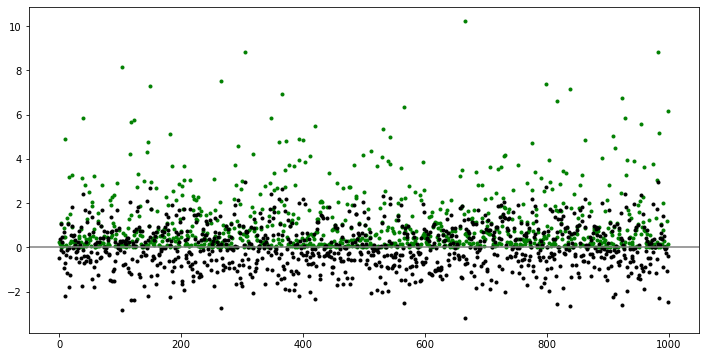

In [25]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the squared zeroed array, each value spaced out evenly along the x axis.
# Note the x axis is just the position of the value in the zeroed array.
ax.plot(range(len(zeroed)), np.square(zeroed), color='green', marker='.', linestyle='none')

# Plot the zeroed array, each value spaced out evenly along the x axis.
# Note the x axis is just the position of the value in the zeroed array.
ax.plot(range(len(zeroed)), zeroed, 'k.')

# Plot the y=0 line.
ax.axhline(y=0.0, color='grey', linestyle='-');

In [26]:
# Calculate the average squared result.
np.mean(np.square(zeroed))

0.9998083851469608

Now, because we have squared the original values, we often take the square root of the answer. For example if we were measuring height, the squared means would be measured in m<sup>2</sup> so to bring the standard deviation back to m, we take the square root. 

In [27]:
# Calculate the square root of the average squared result.
np.sqrt(np.mean(np.square(zeroed)))

0.9999041879835091

In [28]:
# The full calculation using the original array.
np.sqrt(np.mean(np.square(x - np.mean(x))))

0.9999041879835091

This common calculation is built into numpy.

Note this is very close (by design) to the second parameter we sent to `np.random.normal`.

In [29]:
# Note that the function is built into numpy.
x.std()

0.9999041879835091

In [30]:
# Calculate standard deviation for original number arrays 
# A list of numbers - four small and one big.
numbers1 = np.array([1, 1, 1, 1, 10])
numbers2 = np.array([2, 2, 3, 3, 4])

# Their mean
mean1 = np.mean(numbers1)
mean2 = np.mean(numbers2)

# Their standard deviation
sd1 = numbers1.std()
sd2 = numbers2.std()

# Print results 
print(f"Array 1 has a mean of {mean1} and standard deviation of {sd1}.")
print(f"Array 2 has a mean of {mean2} and standard deviation of {sd2}.")


Array 1 has a mean of 2.8 and standard deviation of 3.6.
Array 2 has a mean of 2.8 and standard deviation of 0.7483314773547882.


The standard deviation indicates a much larger spread for the first array (3.6) than the second array (0.75). Standard deviation coupled with the mean tells you more about your population than the mean on its own. 

### Bessel's Correction
***

If you calculate the standard deviation of a sample, it is a biased estimator for the standard deviation of the population.
Standard deviation of a sample will always underestimate the standard deviation of the population. 

Small sample sizes demonstrate the effect clearly. The problem with sd is more apparent with a smaller sample size


In [31]:
# Create 100000 samples of size 5 - standard deviation is 2.0.
samples = np.random.normal(0.0, 2.0, (100000, 5))
samples

array([[ 4.17698445,  1.48370379,  0.54416028, -1.78723725,  2.77689649],
       [ 4.98903218, -2.96309553, -5.75170827, -2.31159675, -2.52048389],
       [-1.66853195,  0.25203571, -5.55239871,  0.15453359, -1.432602  ],
       ...,
       [-1.02265421, -2.06729278, -1.26875844, -1.38844896, -1.81098144],
       [-0.70244502,  2.94564695, -1.98388132, -0.85864479, -3.35556776],
       [-1.59826966, -2.58135802,  0.0438054 ,  0.54305476, -0.76319882]])

In [32]:
# Calculate standard deviation without correction.
stdevs = samples.std(axis=1) # axis=1 means do the sd calculation across each sample of 5
stdevs

array([2.02474043, 3.57215556, 2.10477554, ..., 0.37726115, 2.0964218 ,
       1.12270089])

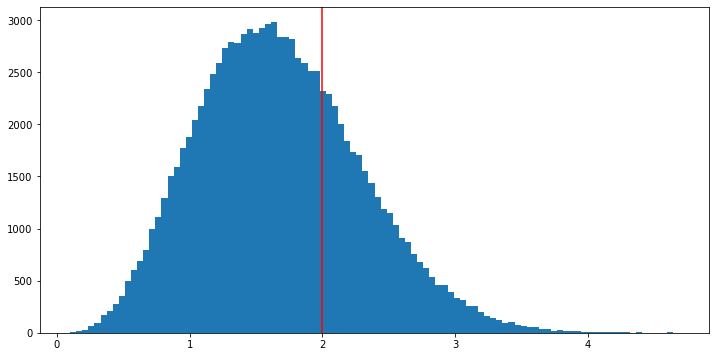

In [33]:
# View a histogram - hopefully we can see the estimate is too small.
fig, ax = plt.subplots(figsize=(12, 6))

# Plot histogram.
plt.hist(stdevs, bins=100)

# Draw a vertical line where the actual standard deviation is.
plt.axvline(x=2.0, color='red'); # draw axis vertical line at 2.0 and colour it red

The standard deviation of the samples (centred around 1.5) are not a good estimate for the standard deviation of the population which is 2.0. This is an example of statistical bias - standard deviation of a sample consistently underestimates the standard deviation of the population. 

### Exercise 2
***
Show that the difference between the standard deviation calculations is greatest for small sample sizes.

The standard deviation calculations increase with small sample sizes because sample size is in the denominator when calculating standard deviation. **[8]**

In the series of plots below, it is clear that the distribution of standard deviations moves away from the standard deviation of the population (1.00) indicated by the red line. As the sample size decreases, and the number of samples taken remains constant, the distribution of the sample standard deviations becomes wider and less compact. The range of standard deviations for samples of size 1000 is 0.94 to 1.06 whereas for samples of size 5, the range is 0.25 to 1.75. 

In [43]:
# Run a simulation of 1000 samples of size 1000.
milli = np.random.normal(5.0, 1.0, (1000, 1000))
milli

array([[4.64367659, 4.76470109, 5.44621778, ..., 2.35555039, 4.83965252,
        5.62760918],
       [4.70260182, 3.95740926, 5.48503381, ..., 5.09296191, 4.24786593,
        5.68400513],
       [4.37013631, 5.02770357, 6.38896286, ..., 5.10736525, 7.01304469,
        3.35759665],
       ...,
       [6.51875721, 5.53557013, 2.80147778, ..., 5.14942704, 5.81332958,
        4.85271759],
       [3.58269113, 5.18276586, 6.56641254, ..., 3.77338255, 5.94586193,
        5.1645022 ],
       [4.4735627 , 4.05832834, 6.11519371, ..., 4.57086731, 4.19968567,
        6.67348652]])

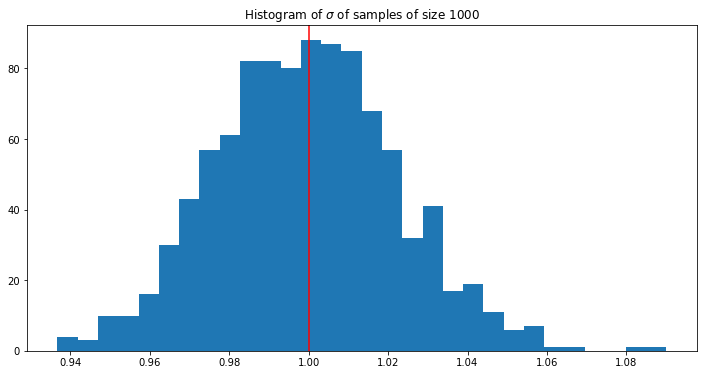

In [78]:
# Calculate the standard deviations of the samples
stdevsMilli = milli.std(axis=1)

# Plot histogram
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(stdevsMilli, bins=30)
ax.set_title(r'Histogram of $\sigma$ of samples of size 1000')

# Insert a vertical red line where the actual standard deviation is
plt.axvline(x=1.0, color='red');

In [45]:
# Run a simulation of 1000 samples of size 100.
cent = np.random.normal(5.0, 1.0, (1000, 100))
cent

array([[4.80000612, 4.79196954, 6.66586455, ..., 5.45018499, 4.8407877 ,
        5.30247682],
       [4.6010184 , 5.59920892, 4.93794306, ..., 4.67834817, 4.22294004,
        3.90156054],
       [4.81876193, 4.20518959, 4.03608503, ..., 5.8225543 , 2.77565001,
        4.451386  ],
       ...,
       [4.02260711, 3.32299284, 5.04190225, ..., 3.58504831, 2.99977029,
        3.4311182 ],
       [5.95214084, 4.92820585, 5.72664244, ..., 3.72050127, 4.46955352,
        1.97363679],
       [5.26873704, 6.73884686, 3.66216922, ..., 4.60045058, 5.14521396,
        3.28209766]])

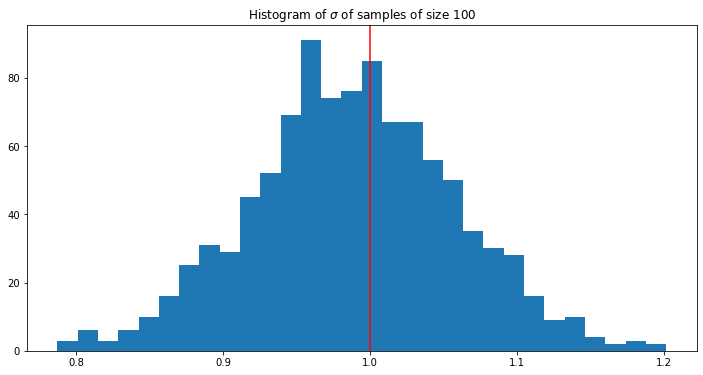

In [79]:
stdevsCent = cent.std(axis=1)
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(stdevsCent, bins=30)
ax.set_title(r'Histogram of $\sigma$ of samples of size 100')
plt.axvline(x=1.0, color='red');

In [47]:
# Run a simulation of 1000 samples of size 10.
dec = np.random.normal(5.0, 1.0, (1000, 10))
dec

array([[5.2436244 , 6.1114732 , 4.95496534, ..., 5.19587943, 5.9378304 ,
        4.86885847],
       [4.33584832, 5.39322759, 4.73071115, ..., 5.79603096, 6.52907307,
        5.79315023],
       [4.48683232, 6.69251453, 4.40519097, ..., 5.63624095, 4.19163545,
        3.72921511],
       ...,
       [5.55347852, 5.18649905, 3.98418958, ..., 5.86359466, 4.66804509,
        3.10817914],
       [5.10525698, 4.77305315, 3.88388   , ..., 5.23940334, 4.97674187,
        5.11798995],
       [5.32319534, 5.60242809, 4.9651367 , ..., 5.7672711 , 3.63177892,
        4.81060625]])

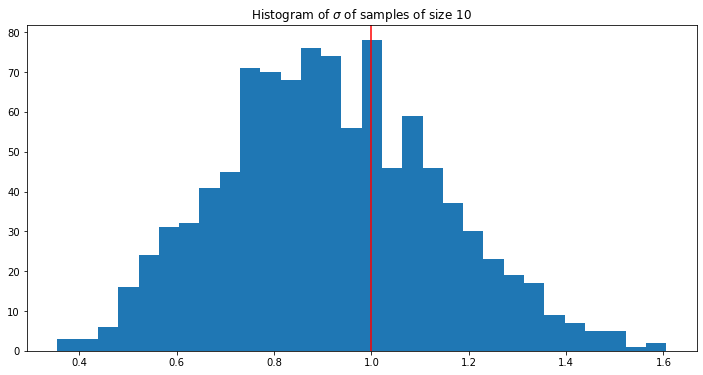

In [80]:
stdevsDec = dec.std(axis=1)
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(stdevsDec, bins=30)
ax.set_title(r'Histogram of $\sigma$ of samples of size 10')
plt.axvline(x=1.0, color='red');

In [67]:
# Run a simulation of 1000 samples of size 5.
semidec = np.random.normal(5.0, 1.0, (1000, 5))
semidec

array([[6.37904801, 5.09721548, 5.54162423, 6.2027722 , 7.05201059],
       [7.61510203, 3.70917326, 5.88705117, 4.28785316, 3.85531517],
       [7.06511079, 4.92283058, 4.82305819, 4.73940429, 5.78383384],
       ...,
       [3.43215819, 6.1342061 , 4.29703582, 4.6834262 , 2.61368638],
       [5.80025859, 4.87928126, 7.16654762, 6.07952432, 3.86828264],
       [4.82947573, 4.83330131, 6.19466395, 5.35630779, 6.29114015]])

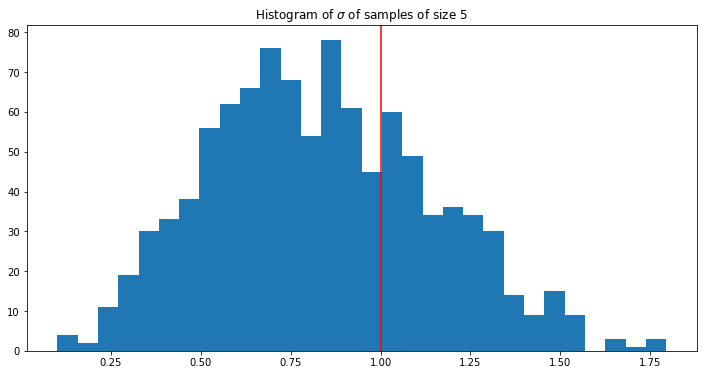

In [81]:
stdevsSemidec = semidec.std(axis=1)
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(stdevsSemidec, bins=30)
ax.set_title(r'Histogram of $\sigma$ of samples of size 5')
plt.axvline(x=1.0, color='red');

## References
1. https://en.wikipedia.org/wiki/List_of_cognitive_biases#Confirmation_bias
2. O'Sullivan ED, Schofield SJ. Cognitive bias in clinical medicine. Journal of the Royal College of Physicians Edinburgh. 2018 Sep;48(3):225-232. doi: https://doi.org/0.4997/JRCPE.2018.306
3. https://my.clevelandclinic.org/health/diagnostics/17704-high-white-blood-cell-count#:~:text=Leukocytosis%20means%20you%20have%20a,fighting%20off%20infection%20or%20inflammation.
4. https://en.wikipedia.org/wiki/Normalcy_bias
5. Chattopadhyay, S., Nelson, N., Au, A., Morales, N., Sanchez, C., Pandita, R., & Sarma, A. (2022). Cognitive Biases in Software Development. Communications of the ACM, 65(4), 115–122. https://doi.org/10.1145/3517217
6. https://en.wikipedia.org/wiki/Egocentric_bias
7. Xiang W, Liu X, Peng Q, Xue Q, Hao W, Yu J (2021) Cognitive bias analysis of young novice drivers’ observation abilities—A questionnaire-based study. PLoS ONE 16(5): e0251195. https://doi.org/10.1371/journal.pone.0251195
8. OpenStax, O. (2021, July 29). 7.2: Using the Central Limit Theorem. Libretexts. https://stats.libretexts.org/@go/page/4584.